import packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets

load iris data

In [37]:
data = pd.read_csv('Data-Week6.csv')
X = data[['FFMC','RH']]
y = data.iloc[:,0]
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,1,sat,82.1,3.7,9.3,2.9,5.3,78,3.1
1,1,sun,18.7,1.1,171.4,0.0,5.2,100,0.9
2,2,mon,84.0,9.3,34.0,2.1,13.9,40,5.4
3,2,fri,86.6,13.2,43.0,5.3,12.3,51,0.9
4,2,thu,84.2,6.8,26.6,7.7,6.7,79,3.1


SVM classification

In [38]:
C=1.0
# svc with linear function
svc =svm.SVC(kernel='linear', C=C).fit(X,y)
# Linearsvc
lin_svc =svm.LinearSVC(C=C).fit(X,y)
# svc with RBF kernel
rbf_svc =svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,y)
# svc with polynomial kernel for degree>1
poly_svc=svm.SVC(kernel='poly',degree=3, C=C).fit(X,y)

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


make 2*2 subplots

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


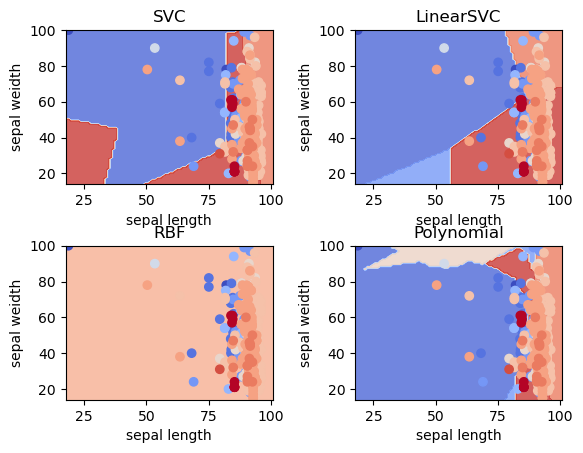

In [39]:
h=1

# create the mesh grid
x_min, x_max=X.iloc[:,0].min()-1, X.iloc[:,1].max()+1
y_min, y_max=X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
xx, yy= np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Insert the titles as well. 
titles=['SVC','LinearSVC','RBF','Polynomial']

# make a 2*2 subplot
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal weidth')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(titles[i])
    
plt.show()

In [40]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 

# Importing the dataset from the sklearn library into a local variable called dataset
dataset = data

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

# Making the SVM Classifer
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for Linear is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for Linear is: 44.230769230769226
Confusion Matrix
[[ 0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  2 13  0  0]
 [ 0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0  0  2  8  0  0]
 [ 1  0  0  0  0 33 24  0  0]
 [ 0  0  0  0  0 15 36  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  3  0  0]]


In [41]:
Classifier = SVC(kernel="rbf")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for rbf is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for rbf is: 35.256410256410255
Confusion Matrix
[[ 0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0  0  5 10  0  0]
 [ 0  0  0  0  0  2  1  0  0]
 [ 0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0  0  4  6  0  0]
 [ 0  0  0  0  0 26 32  0  0]
 [ 0  0  0  0  0 22 29  0  0]
 [ 0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  1  2  0  0]]


In [42]:
Classifier = SVC(kernel="poly")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for poly is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for poly is: 46.15384615384615
Confusion Matrix
[[ 3  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  1 14  0  0]
 [ 0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0  0  2  8  0  0]
 [ 1  0  0  0  0 32 25  0  0]
 [ 0  0  0  0  0 14 37  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 1  0  0  0  0  0  2  0  0]]


In [43]:
Classifier = svm.LinearSVC(C=C)

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVC is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVC is: 35.256410256410255
Confusion Matrix
[[ 0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  2  6  7  0]
 [ 0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  3  0  0]
 [ 0  0  0  0  0  2  5  3  0]
 [ 0  0  0  0  0 29 25  4  0]
 [ 0  0  0  0  0 13 26 12  0]
 [ 0  0  0  0  0  1  3  0  0]
 [ 0  0  0  0  0  0  1  2  0]]


C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
